In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML
from integrators import *
from n_body_rhs import *
from n_body_ic import *
import time

def plot_3body(y):
    # show trajectories of all bodies on the same plot
    plt.plot(y[:,0],y[:,1],label='body1')
    plt.plot(y[:,2],y[:,3],label='body2')
    plt.plot(y[:,4],y[:,5],label='body3')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Project 5.19. The classical helium atom

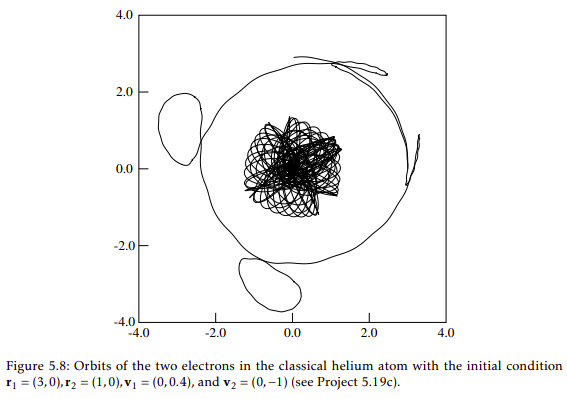

The classical helium atom is a relatively simple example of a three-body problem and is similar
to the gravitational three-body problem of a heavy sun and two light planets. The important
difference is that the two electrons repel one another, unlike the planetary case where the intraplanetary interaction is attractive. If we ignore the small motion of the heavy nucleus, the
equations of motion for the two electrons can be written as

$$ a_1 = -2\frac{r_1}{r_1^3} + \frac{r_1-r_2}{r_{12}^3} $$
$$ a_2 = -2\frac{r_2}{r_2^3} + \frac{r_2-r_1}{r_{12}^3} $$

where $r_1$ and $r_2$ are measured from the fixed nucleus at the origin, and $r_{12}$ is the distance between the two electrons. We have chosen units such that the mass and charge of the electron
are both unity. The charge of the helium nucleus is two in these units. Because the electrons
are sometimes very close to the nucleus, their acceleration can become very large, and a very
small time step ∆t is required. It is not efficient to use the same small time step throughout
the simulation, and instead a variable time step or an adaptive step size algorithm is suggested.
An adaptive step size algorithm can be used with any standard numerical algorithm for solving
differential equations. The RK45 algorithm described in Appendix 3A is adaptive and is a good
all-around choice for these types of problems.

rtol:  1e-14
atol:  1e-10
Time Elapsed = 5.181 seconds.


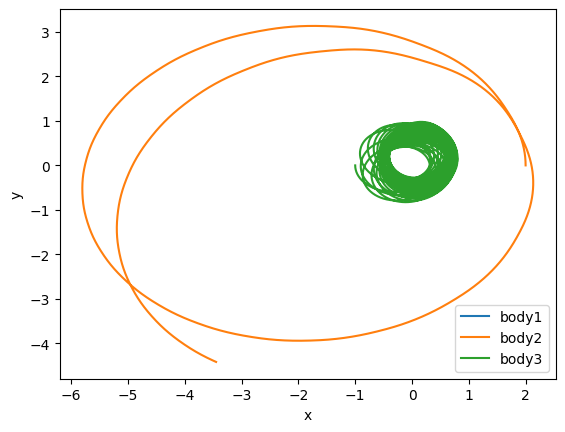

In [9]:
y0 = helium_1
p  = p_he
dt = .01
t_span = [0,100]
d=2

atol = 1e-10
rtol = 1e-14

start_t = time.time()
t_s,y = solve_ode_RK45(n_body,t_span, y0, RK45, args=(p,),atol=atol,rtol=rtol,first_step=dt)
end_t = time.time()
print("Time Elapsed = %4.3f seconds."%(end_t-start_t))
plot_3body(y)
# anim = show_anim(t_s,y)
# HTML(anim.to_html5_video())
# plt.style.use("seaborn-v0_8")
# plt.axis("on")
# E = total_energy(y,p)
# #plt.plot(E,'r')
# small = 1e-7
# plt.ylim(E.min()*(1-small),E.max()*(1+small))